In [47]:
#Подключение библиотек numpy и pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

In [11]:
#Загрузка и создание датасета
dataset = pd.read_csv('S02-hw-dataset.csv')
df = pd.DataFrame(dataset)


In [20]:
#Вывод первых 10 строк, информации о стольцах и базовой описательной статистики
print("Пример вывода первых 10 строк")
print(df.head(10))
print("Информация о столбцах и типах")
print(df.info())
print("Базовые описательные статистики")
print(df.describe())


Пример вывода первых 10 строк
   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0
7        8   28.0      CN          2      456
8        9   39.0      US          4      980
9       10   24.0      RU          7      511
Информация о столбцах и типах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage

In [58]:
#Пропуски, дубликаты и базовый контроль качества
print("Доля пропусков в каждом столбце")
print(df.isna().mean())
print("Количество полностью дублирующих строк")
print(df.duplicated().sum())
print("Проверка подозрительных случаев")
dataset_errors = df[(df['age'] < 10) | (df['age'] > 100) | (df['purchases'] < 0)
                     | ((df['purchases'] == 0) & df['revenue'] > 0)|((df['purchases'] > 0) & (df['revenue'] == 0))
                     | (df.duplicated() == True) | df.isna().any(axis = 1)]
print(dataset_errors)
print("В результате проверки были выявлены ошибки такие как: дубликаты user_id,\n" \
"неправильно указанный возраст или его отсутсвие, неправильные сведения о покупках(отрицательное значение),\n" \
"а также отсутсвие дохода при наличии покупок")


Доля пропусков в каждом столбце
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Количество полностью дублирующих строк
1
Проверка подозрительных случаев
    user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0
12       13    NaN      US          9      630
20       21    5.0      RU          8     1488
40       10   24.0      RU          7      511
В результате проверки были выявлены ошибки такие как: дубликаты user_id,
неправильно указанный возраст или его отсутсвие, неправильные сведения о покупках(отрицательное значение),
а также отсутсвие дохода при наличии покупок


In [95]:
# Пропуски, дубликаты и базовый контроль качества
correct_dataset = df[
    (~df.duplicated())                                        # убрать точные дубликаты строк
    & (~df['user_id'].duplicated(keep='first'))               # оставить по одному record на user_id (первая встреча)
    & (df['age'] > 10) & (df['age'] < 100)                    # убрать явно неверные возраста
    & (df['purchases'] >= 0)                                  # убрать отрицательные purchases
    & (~((df['purchases'] > 0) & (df['revenue'] == 0)))      # убрать несогласованные записи purchases>0 и revenue==0
    & (~df.isna().any(axis=1))                                # убрать строки с любыми пропусками
]

# Частоты по странам и агрегаты
country_counts = correct_dataset['country'].value_counts()
print(country_counts)

grouped = correct_dataset.groupby('country').agg({
    'age': ['median', 'mean'],
    'purchases': ['sum', 'mean'],
    'revenue': ['sum', 'mean'],
})
print(grouped)

print('В результате видно, что большинство покупателей в возратсе от 24 до 40 лет,\n' \
'большинство покупок производится из страны FR, однако доход больше в RU,\n' \
'также заметно, что наименьшее количесвто покупок было из CN соответственно там же наименьший доход,\n' \
'самый высокий средний возраст покупателе из FR, а самый низкий в CN')

country
FR    10
RU     9
US     6
DE     5
CN     2
Name: count, dtype: int64
           age            purchases           revenue             
        median       mean       sum      mean     sum         mean
country                                                           
CN        24.0  24.000000         9  4.500000    2108  1054.000000
DE        35.0  34.600000        33  6.600000    7377  1475.400000
FR        42.0  40.700000        52  5.200000    7326   732.600000
RU        31.0  32.444444        47  5.222222    8272   919.111111
US        40.5  38.833333        24  4.000000    3829   638.166667
В результате видно, что большинство покупателей в возратсе от 24 до 40 лет,
большинство покупок производится из страны FR, однако доход больше в RU,
также заметно, что наименьшее количесвто покупок было из CN соответственно там же наименьший доход,
самый высокий средний возраст покупателе из FR, а самый низкий в CN


n=35, Sturges=7, Sqrt=6, Freedman–Diaconis=6


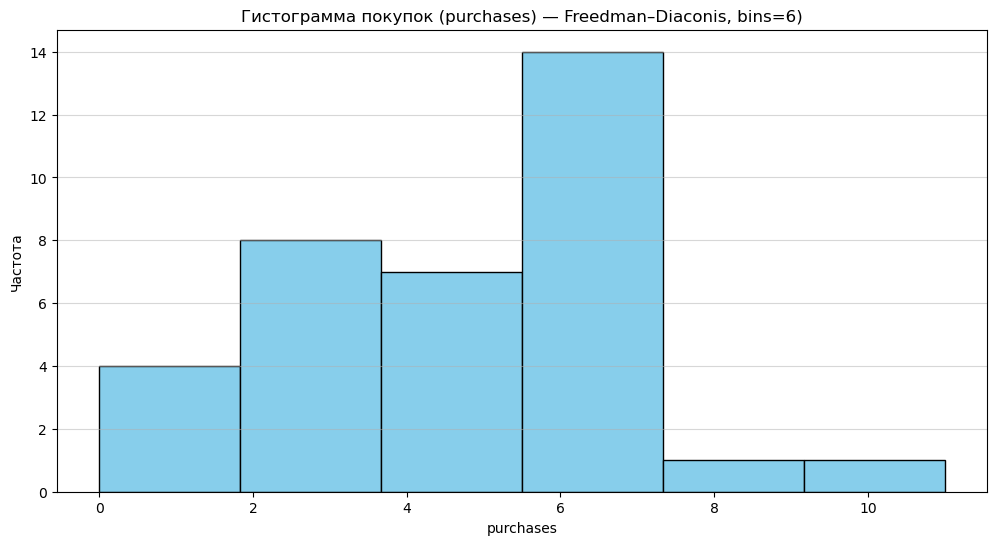

Гистограмма сохранена в figures
Гистограмма показывает распределение количества покупок среди пользователей.
Видно, что большинство пользователей совершают приблизительно 6 - 7 покупок.


In [79]:
#Визуализация данных в Matplotlib
# Используем очищенный набор correct_dataset (предварительно вычислён в ячейке выше)
data = correct_dataset['purchases']
n = len(data)
# Осмысленный выбор числа корзин по следующим правилам: Sturges, Sqrt и Freedman–Diaconis
bins_sturges = ceil(np.log2(n) + 1) if n>0 else 10
bins_sqrt = int(ceil(np.sqrt(n))) if n>0 else 10
if n > 0:
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:
        bins_fd = bins_sqrt
    else:
        bin_width = 2 * iqr / (n ** (1/3))
        bins_fd = max(1, int(ceil((data.max() - data.min()) / bin_width)))
else:
    bins_fd = 10
print(f'n={n}, Sturges={bins_sturges}, Sqrt={bins_sqrt}, Freedman–Diaconis={bins_fd}')
# Построение гистограммы с выбранным числом корзин (FD)
plt.figure(figsize=(12,6))
plt.hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма покупок (purchases) — Freedman–Diaconis, bins={bins_fd})')
plt.xlabel('purchases')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.savefig('figures/purchases_histogram.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()
print('Гистограмма сохранена в figures')
print('Гистограмма показывает распределение количества покупок среди пользователей.\n' \
'Видно, что большинство пользователей совершают приблизительно 6 - 7 покупок.')

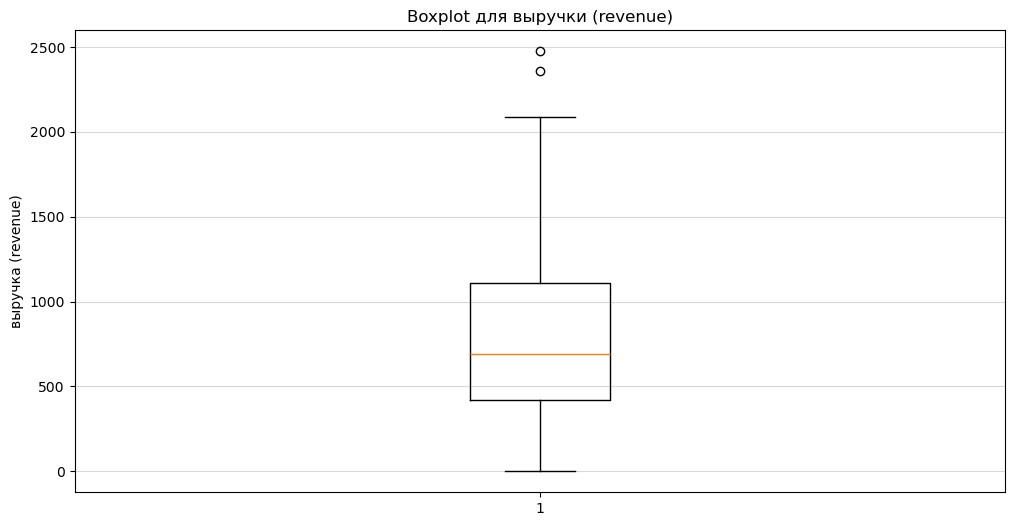

Из блоксплота для выручки видно, что медиана выручки держится на уровне оклола 600 - 700
Нижний ус держится примерно на уровне 400, а верхний ус на уровне около 1200. Также видны 2 выброса выше верхнего уса


In [77]:
plt.figure(figsize=(12,6))
plt.boxplot(correct_dataset['revenue'])
plt.title('Boxplot для выручки (revenue)')
plt.ylabel('выручка (revenue)')
plt.grid(axis='y', alpha=0.5)
out_path = 'figures/revenue_boxplot.png'
plt.savefig(out_path, dpi=150, bbox_inches='tight')
plt.show()
plt.close()
print('Из блоксплота для выручки видно, что медиана выручки держится на уровне оклола 600 - 700\n' \
'Нижний ус держится примерно на уровне 400, а верхний ус на уровне около 1200. Также видны 2 выброса выше верхнего уса')

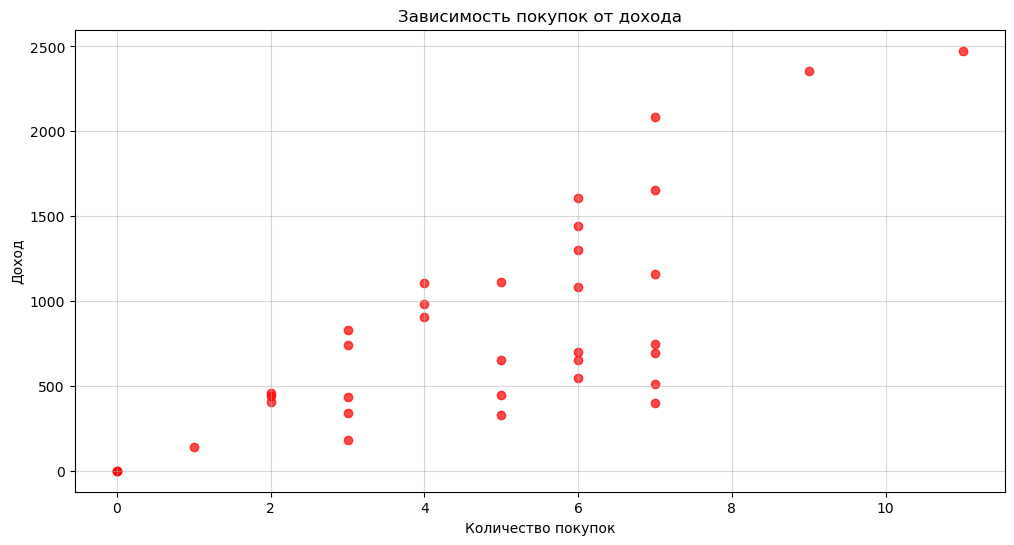

Диаграмма рассеяния показывает зависимость между количеством покупок и доходом.
Доход растет прямо пропорционально количеству покупок.



In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(correct_dataset['purchases'], correct_dataset['revenue'], alpha=0.7, color='red')
plt.title('Зависимость покупок от дохода')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.grid(alpha=0.5)
out_path = 'figures/purchases_revenue_scatter.png'
plt.savefig(out_path, dpi=150, bbox_inches='tight')
plt.show()
plt.close()
print("Диаграмма рассеяния показывает зависимость между количеством покупок и доходом.\n" \
"Доход растет прямо пропорционально количеству покупок.\n")